In [2]:
empty!(ARGS)
#push!(ARGS, "G:/Hamburg/b20.0_mu1.0/lDGAConfig.toml")
push!(ARGS, "G:/tmp_ED_data/U2.0_b20.0_mu1.0.toml")
include(joinpath(@__DIR__,"../examples/example03_ConditionCurves.jl"))

using LaTeXStrings

  Activating project at `G:\Codes\LadderDGA.jl`
[ Info: Precompiling LadderDGA [78e40beb-bf89-4c0e-9d2b-bee278912f2b] (cache misses: include_dependency fsize change (20))


[ Info: Reading Inputs...
[ Info: m channel: |∑χ(q=0,ω≠0)| = 0.564732218063 ≟ 0
[ Info: d channel: |∑χ(q=0,ω≠0)| = 0.527597366631 ≟ 0


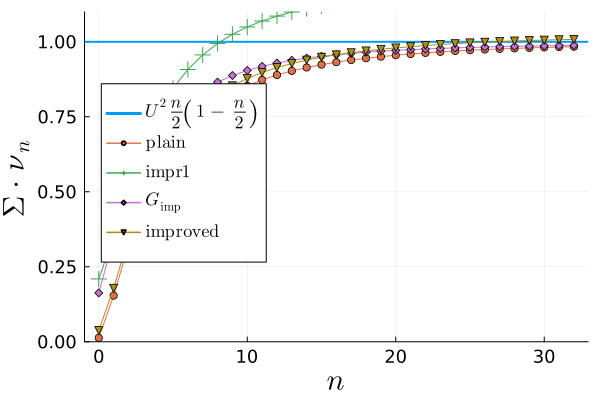

In [3]:
mP = lDGAhelper.mP
kG = lDGAhelper.kG
U = mP.U
nden = mP.n
beta = mP.β
lim_se = U^2 * (nden/2) * (1 - nden/2)
xr = collect(axes(se_ntc,2))
iν_arr = LadderDGA.iν_array(beta, xr)
gimp = lDGAhelper.gImp[1,xr]

Σλ_ntc = res_m_ntc.Σ_ladder
Σλ_tc = res_m.Σ_ladder 
tc_factor = LadderDGA.tail_factor(mP.U, mP.β, mP.n, lDGAhelper.Σ_loc, iν_arr)
tc_term  = LadderDGA.tail_correction_term(sum_kω(kG, χm, λ = res_m.λm), lDGAhelper.χloc_m_sum, tc_factor)

hline([lim_se], linewidth=2, label=L"U^2 \frac{n}{2} \left(1 - \frac{n}{2} \right)", xlabel=L"n", ylabel= L"\Sigma \cdot \nu_n",xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12)
plot!(xr, real(Σλ_ntc[1,:].parent .* iν_arr), markershape=:auto, label = L"\mathrm{plain}")
plot!(xr, real(Σλ_tc[1,:].parent .* iν_arr), markershape=:auto, label = L"\mathrm{impr}1", markersize=8)
plot!(xr, real(gimp .* iν_arr), markershape=:auto, label = L"G_\mathrm{imp}")
plot!(xr, real((Σλ_ntc[:,:].parent .+ tc_term ./ (2*U^2))[1,:] .* iν_arr), markershape=:auto, label = L"\mathrm{improved}", ylims=(0.0,1.1), legend=:left)

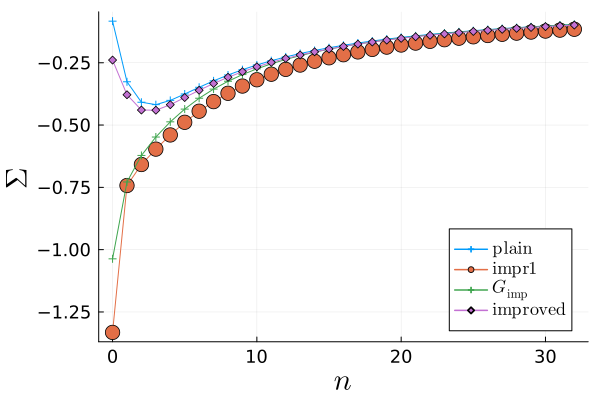

In [4]:

plot(xr, imag(Σλ_ntc[1,:].parent), markershape=:auto, label = L"\mathrm{plain}", xlabel=L"n", ylabel= L"\Sigma",xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12)
plot!(xr, imag(Σλ_tc[1,:].parent), markershape=:auto, label = L"\mathrm{impr}1", markersize=8)
plot!(xr, imag(gimp ), markershape=:auto, label = L"G_\mathrm{imp}")
plot!(xr, imag((Σλ_ntc[:,:].parent .+ tc_term ./ (2*U^2))[1,:] ), markershape=:auto, label = L"\mathrm{improved}", legend=:bottomright)

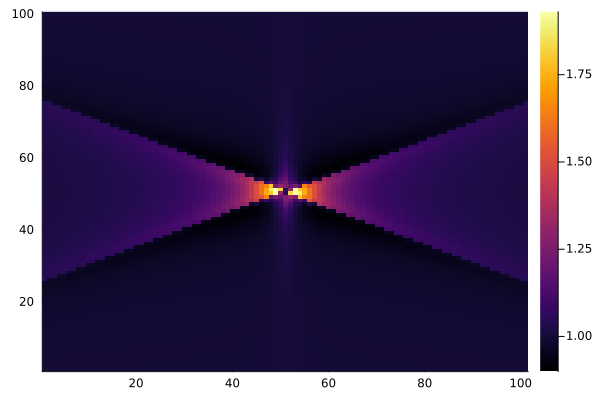

In [8]:
heatmap(real(γm[end,:,:]))

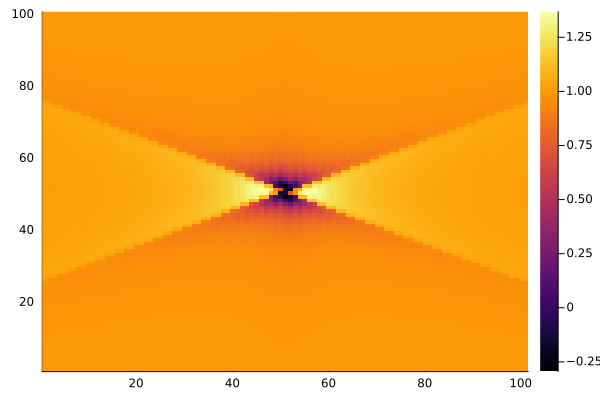

In [14]:
heatmap(real(γd[end,:,:]))

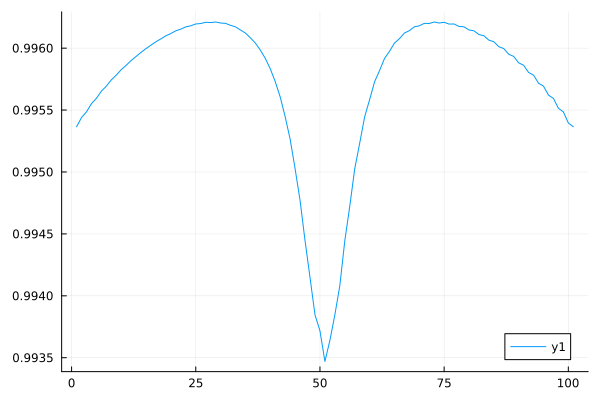

In [35]:
plot(real(γd[end,1,:]))

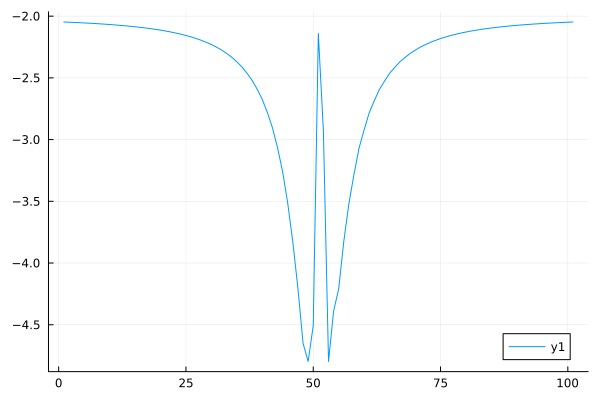

In [32]:
plot(real(γd[end,1,:] .- 3 .* γm[end,51,:]))

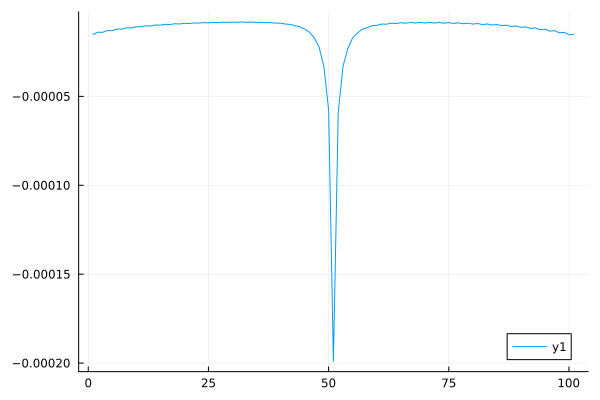

In [31]:
plot(imag(γm[1,1,:]))

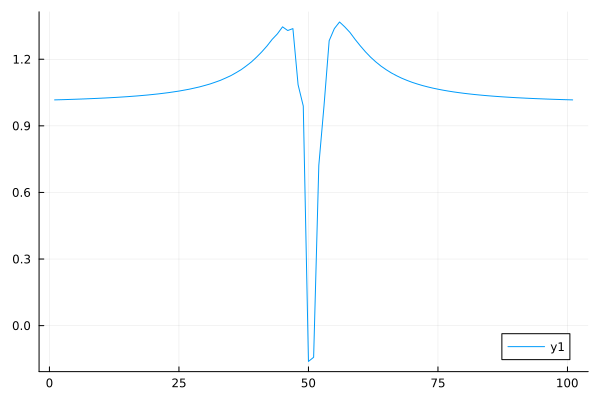

In [22]:
plot(real(γd[end,50,:]))

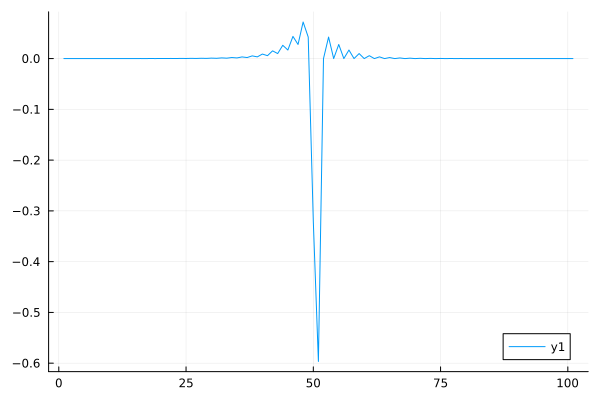

In [20]:
plot(imag(γd[end,50,:]))

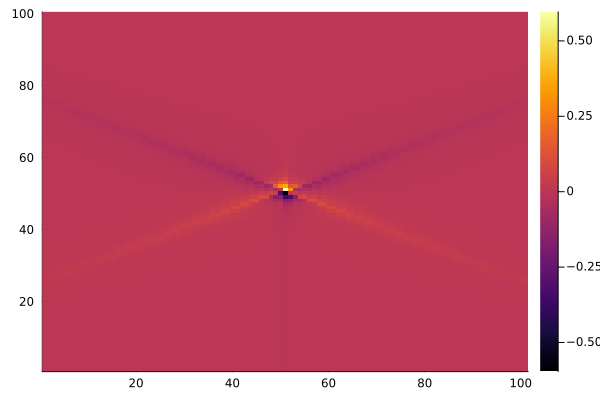

In [15]:
heatmap(imag(γd[end,:,:]))

In [68]:
γm

21×100×101 γT:
[:, :, 1] =
  0.99512-1.50911e-5im  0.994994-1.73648e-5im  …   0.99512+1.50911e-5im
 0.995127-1.52233e-5im  0.995002-1.74996e-5im     0.995127+1.52233e-5im
 0.995133-1.53571e-5im  0.995009-1.76376e-5im     0.995133+1.5357e-5im
 0.995143-1.54035e-5im  0.995019-1.76617e-5im     0.995143+1.54034e-5im
 0.995148-1.55373e-5im  0.995024-1.78035e-5im     0.995148+1.55373e-5im
 0.995159-1.57099e-5im  0.995036-1.79708e-5im  …  0.995159+1.57099e-5im
 0.995158-1.52644e-5im  0.995035-1.74471e-5im     0.995158+1.52644e-5im
 0.995162-1.53927e-5im  0.995039-1.75874e-5im     0.995162+1.53926e-5im
 0.995168-1.55471e-5im  0.995046-1.7747e-5im      0.995168+1.5547e-5im
 0.995173-1.53628e-5im  0.995051-1.75146e-5im     0.995173+1.53628e-5im
 0.995168-1.48382e-5im  0.995046-1.69147e-5im  …  0.995168+1.48382e-5im
  0.99517-1.496e-5im    0.995048-1.70518e-5im      0.99517+1.496e-5im
 0.995174-1.50994e-5im  0.995051-1.72047e-5im     0.995174+1.50993e-5im
 0.995174-1.49072e-5im  0.995052-1.69758e

In [5]:
results_λm, results_λd, results_n, results_mu, results_E_kin_1, results_E_pot_1, results_E_pot_2, results_E_lhs_c1 = LadderDGA.LambdaCorrection.λdm_correction_curve(χm, γm, χd, γd, λ₀, lDGAhelper; λd_max=30.0, λd_samples=500, tc=true)
plot(results_λd, results_E_pot_2 .- results_E_pot_1, markershape=:auto, xlabel=L"\lambda_\mathrm{d}", ylabel=L"E^{(2)}_\mathrm{pot} - E^{(1)}_\mathrm{pot}", label="No Tail Correction")

LoadError: UndefVarError: `λdm_correction_curve` not defined in `LadderDGA.LambdaCorrection`
Suggestion: check for spelling errors or missing imports.